<a href="https://colab.research.google.com/github/zjzsu2000/CMPE258/blob/master/assignment3/keras_based_models_for_classifying_using_CNN_planet_amazon_data_set_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#keras based models for classifying using CNN planet amazon data set 

## load the Data

ref: 

1.   https://www.kaggle.com/general/74235
2.  https://www.kaggle.com/nikitarom/planets-dataset

In [0]:
! pip install -q --upgrade kaggle 

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle competitions download -c 'planet-understanding-the-amazon-from-space'
! kaggle datasets download nikitarom/planets-dataset


Saving planets-dataset.zip to planets-dataset.zip


In [14]:
!unzip planets-dataset.zip
# ! ls Planet

unzip:  cannot find or open planets-dataset.zip, planets-dataset.zip.zip or planets-dataset.zip.ZIP.


## multi classes classification

In [0]:
import pandas as pd

# getting planets and tags from training dataset
path = "planet/planet/"
data = pd.read_csv('planet/planet/train_classes.csv')


In [0]:
data.head(10)

In [0]:
import cv2
import tqdm
import numpy as np
import matplotlib.pyplot as plt





{'haze': 0, 'cultivation': 1, 'clear': 2, 'artisinal_mine': 3, 'conventional_mine': 4, 'bare_ground': 5, 'habitation': 6, 'agriculture': 7, 'water': 8, 'road': 9, 'slash_burn': 10, 'partly_cloudy': 11, 'primary': 12, 'blooming': 13, 'selective_logging': 14, 'blow_down': 15, 'cloudy': 16}


In [0]:
flatten = lambda l: [item for sublist in l for item in sublist]
tags = list(set(flatten([l.split(' ') for l in df['tags'].values])))
labels = {l: i for i, l in enumerate(tags)}

In [0]:
print(labels)

In [0]:
X_train = []
y_train = []


for name, tags in tqdm.tqdm(df.values, miniters=100):
    
    image = cv2.imread(folder + "train-jpg/" + name + ".jpg")
    targets = np.zeros(17)
    for tag in tags.split(' '):
        targets[labels[tag]] = 1
    #print(image)
    X_train.append(cv2.resize(image, (64, 64)))
    y_train.append(targets)

X_train = np.array(X_train, np.float16) / 255
y_train = np.array(y_train, np.uint8)

100%|██████████| 40479/40479 [00:50<00:00, 804.78it/s]


In [0]:
X_train[0].shape

(64, 64, 3)

In [0]:
X_train[0]

array([[[0.396 , 0.4275, 0.3608],
        [0.4236, 0.447 , 0.4   ],
        [0.408 , 0.4353, 0.3804],
        ...,
        [0.4119, 0.4353, 0.3687],
        [0.4   , 0.4158, 0.341 ],
        [0.4038, 0.4275, 0.3726]],

       [[0.4119, 0.4236, 0.3687],
        [0.408 , 0.443 , 0.3765],
        [0.4197, 0.4392, 0.3765],
        ...,
        [0.4   , 0.4275, 0.3647],
        [0.4158, 0.447 , 0.3726],
        [0.396 , 0.4197, 0.341 ]],

       [[0.408 , 0.4236, 0.3647],
        [0.408 , 0.4236, 0.3687],
        [0.4158, 0.443 , 0.3843],
        ...,
        [0.396 , 0.4158, 0.3372],
        [0.4038, 0.4275, 0.3647],
        [0.3882, 0.4158, 0.3333]],

       ...,

       [[0.4119, 0.443 , 0.3765],
        [0.4119, 0.4314, 0.357 ],
        [0.4158, 0.4236, 0.3647],
        ...,
        [0.4   , 0.4314, 0.3608],
        [0.408 , 0.4314, 0.357 ],
        [0.4158, 0.4314, 0.353 ]],

       [[0.4158, 0.451 , 0.3804],
        [0.4119, 0.4392, 0.3608],
        [0.4197, 0.4353, 0.353 ],
        .

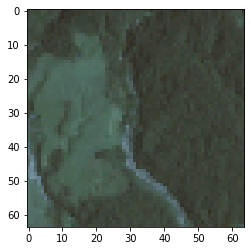

In [0]:

img = np.array(X_train[1],dtype='float64')
plt.imshow(img)
plt.show()

In [0]:
y_train[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

###train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

### Function to create sequential model
#### Add convolutional layers,BatchNormalization,apply dropout

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout,Flatten,Dense
import tensorflow as tf
import datetime
from keras.callbacks import EarlyStopping, TensorBoard


def create_model():
    model = Sequential([Conv2D(32, kernel_size=(3,3), activation='relu', 
                                input_shape=(64, 64, 3)),
                        MaxPooling2D(),
                        Dropout(0.7),
                        Conv2D(64, kernel_size=(3,3), activation='relu'),
                        MaxPooling2D(),
                        Dropout(0.7),
                        Conv2D(128, kernel_size=(3,3), activation='relu'),
                        MaxPooling2D(),
                        Dropout(0.7),
                        Flatten(),
                        Dense(1024, activation='relu'),Dropout(0.7),
                        Dense(17,activation='sigmoid')
                        ])
    return model

In [13]:
model = create_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)      

## create tensorboard and upload

ref:
> https://www.tensorflow.org/tensorboard/get_started

> https://tensorboard.dev/#get-started





In [0]:
log_dir="logs/3conv-5epochs-0.7dropout-batchnorm-sigmoid-adam-binary_crossentropy" 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_val, y_val), 
          callbacks=[tensorboard_callback])

Train on 30359 samples, validate on 10120 samples
Epoch 1/5
30359/30359 [==============================] - 13s 412us/step - loss: 0.1674 - accuracy: 0.9346 - val_loss: 0.2784 - val_accuracy: 0.9064
Epoch 2/5
30359/30359 [==============================] - 12s 408us/step - loss: 0.1673 - accuracy: 0.9348 - val_loss: 0.2619 - val_accuracy: 0.9076
Epoch 3/5
30359/30359 [==============================] - 12s 410us/step - loss: 0.1669 - accuracy: 0.9349 - val_loss: 0.2600 - val_accuracy: 0.9060
Epoch 4/5
30359/30359 [==============================] - 12s 407us/step - loss: 0.1668 - accuracy: 0.9347 - val_loss: 0.2465 - val_accuracy: 0.9074
Epoch 5/5
30359/30359 [==============================] - 13s 424us/step - loss: 0.1656 - accuracy: 0.9349 - val_loss: 0.2505 - val_accuracy: 0.9062


In [0]:
!tensorboard dev upload --logdir ./logs \
  --name "Understanding the Amazon from Space" \
  --description "Training results from https://colab.research.google.com/drive/1iNCPKX8iH4wI4rPKMaVXOWV02xJ2lfsQ?usp=sharing"

2020-05-02 06:26:05.620014: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Data for the "graphs" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
Upload started and will continue reading any new data as it's added
to the logdir. To stop uploading, press Ctrl-C.
View your TensorBoard live at: https://tensorboard.dev/experiment/oQPng8DkR5Gn2w1sYBRbyA/
E0502 06:26:08.970737 140019514959744 uploader.py:770] Attempted to re-upload existing blob.  Skipping.
E0502 06:26:14.923841 140019514959744 uploader.py:770] Attempted to re-upload existing blob.  Skipping.
E0502 06:26:18.966506 140019514959744 uploader.py:770] Attempted to re-upload existing blob.  Skipping.

Upload stopped. View your TensorBoard at https://tensorboard.dev/experiment/oQPng8DkR5Gn2w1sYBRbyA/
^C
